In [219]:
#Importing needed modules .
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers , Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [220]:
#Creating a function in oreder to generate photos .
def Generate_image(train_path,test_path)->'ImageDataGenerator object' :
    '''function docstring'''
    train_gen = ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
    test_gen = ImageDataGenerator(rescale=1/255)
    ready_train = train_gen.flow_from_directory(train_path,target_size=(150,150),batch_size=5,class_mode='binary')
    ready_test = test_gen.flow_from_directory(test_path,target_size=(150,150),batch_size=2,class_mode='binary')
    return ready_train , ready_test
    
train_dir = "D:\\datasets\\pandas or bear\\PandasBears\\Train"
test_dir = "D:\\datasets\\pandas or bear\\PandasBears\\Test"
train , test = Generate_image(train_dir,test_dir)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [221]:
#Creating an object in order to stop the model at 99 % accuracy .
class Call_back(Callback) :
    def on_epoch_end(self,epoch,log=dict()) :
        '''function docstring'''
        if (log.get('accuracy') is not None) and (log.get('accuracy')>=0.99) :
            print('Accuracy has reached to over 99 % , so stopping training .')
            self.model.stop_training = True 

In [222]:
#Building a model using a pre trained model .
def Create_model()->None :
    '''function docstring'''
    pre = InceptionV3(include_top=False,input_shape=(150,150,3))
    for layer in pre.layers :
        layer.trainable = False
    last_l = pre.get_layer('mixed7')
    out = last_l.output
    x = layers.Flatten()(out)
    x = layers.Dense(32,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(1,activation='sigmoid')(x)
    model = Model(pre.input,x)
    model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [223]:
call = Call_back()
#Data train .
history = Create_model().fit(train,epochs=5,validation_data=test,callbacks=call)

Epoch 1/5
100/100 [==============================] - 46s 418ms/step - loss: 0.0521 - accuracy: 0.9760 - val_loss: 7.4430e-06 - val_accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - 41s 408ms/step - loss: 2.4923e-04 - accuracy: 1.0000 - val_loss: 7.1863e-09 - val_accuracy: 1.0000


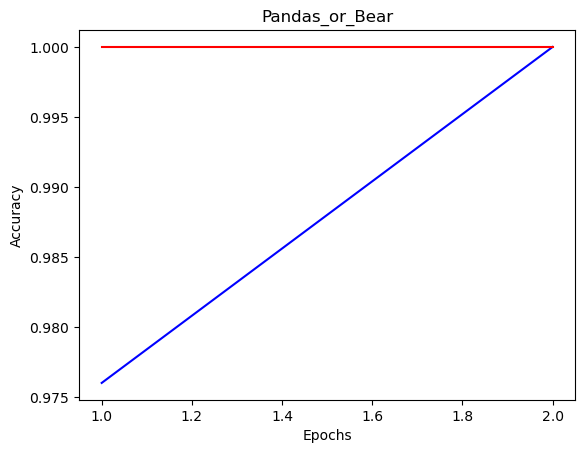

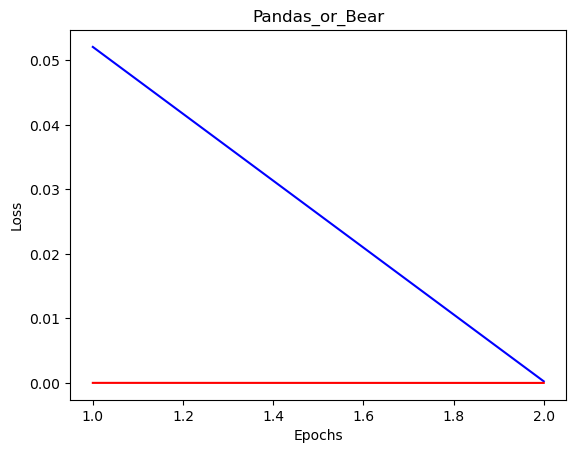

In [224]:
#Visualize models performance
epoch = range(1,len(history.epoch)+1)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Pandas_or_Bear')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Pandas_or_Bear')
plt.show()